In [138]:
from csv import DictReader

flows = []
with open('../../data/navigo_all_pointcalls.csv', newline='', encoding='utf8') as csvfile:
    reader = DictReader(csvfile)
    for row in reader:
        if \
                 row['source_suite'] != 'G5' \
            and row['source_suite'] != 'Expéditions coloniales Marseille (1789)' \
            and row['date_fixed'].split('-')[0] == '1789' \
            and row['pointcall_rank_dedieu'] == '1.0' \
            :
            flows.append(dict(row))

print(len(flows))

5323


In [139]:
flows[0]

{'ship_id': '',
 'pkid': '141583',
 'record_id': '00363269',
 'source_doc_id': '00358327',
 'source_text': 'AdBR, 200 E 608',
 'source_suite': 'Registre du petit cabotage (1786-1787)',
 'pointcall_uhgs_id': 'A0124996',
 'toponyme_fr': 'Martigues',
 'pointcall_admiralty': 'Martigues',
 'pointcall_province': 'Provence',
 'state_fr': 'France',
 'substate_fr': '',
 'pointcall_out_date': '1789<09<14',
 'pointcall_action': 'Out',
 'pointcall_in_date': '',
 'net_route_marker': '',
 'fixed_net_route_marker': '',
 'certitude': 'Observé',
 'pointcall_function': 'A',
 'navigo_status': 'PC-RS',
 'pointcall_rank_dedieu': '1.0',
 'pointcall_rankfull': '43467',
 'data_block_leader_marker': '',
 'pointcall_uncertainity': '0',
 'ship_name': 'Unnamed',
 'tonnage': '',
 'tonnage_unit': '',
 'tonnage_class': '',
 'flag': '',
 'ship_flag_id': '',
 'ship_flag_standardized_fr': '',
 'captain_id': '',
 'captain_name': 'Gras, Jean Baptiste',
 'homeport': '',
 'homeport_substate_1789_fr': '',
 'homeport_state_1

In [140]:
set([f['source_suite'] for f in flows])

{'Registre du petit cabotage (1786-1787)',
 'la Santé registre de patentes de Marseille'}

In [141]:
flows_sourced = [f for f in flows if f['net_route_marker'] != 'Q']
print(len(flows_sourced))

5188


On a  filtré les net_route_marker = Q pour supprimer les doublons du petit cabotage

In [142]:
set([f['state_fr'] for f in flows])

{'',
 'Autriche',
 'Danemark',
 'Duché de Courlande',
 'Duché de Massa et Carrare',
 'Empire ottoman',
 'Empire russe',
 'Espagne',
 'Etats pontificaux',
 "Etats-Unis d'Amérique",
 'France',
 'Grande-Bretagne',
 'Hambourg',
 'Malte',
 'Maroc',
 'Monaco',
 'Portugal',
 'Provinces-Unies',
 'Prusse',
 'Royaume de Naples',
 'Royaume de Piémont-Sardaigne',
 'République de Gênes',
 'République de Lucques',
 'République de Raguse',
 'République de Venise',
 'Suède',
 'Toscane'}

In [143]:
state_to_partner = {
    '': 'Inconnu',
    'Autriche': 'Flandre et autres états de l\'Empereur',
    'Danemark': 'Nord',
    'Duché de Courlande': 'Nord',
    'Duché de Massa et Carrare': 'Italie',
    'Empire ottoman':'Levant et Barbarie',
    'Empire russe': 'Nord',
    'Espagne': 'Espagne',
    'Etats pontificaux': 'Italie',
    "Etats-Unis d'Amérique": "États-Unis d'Amérique",
    'France': 'France',
    'Grande-Bretagne': 'Angleterre',
    'Hambourg': 'Nord',
    'Malte': 'Italie',
    'Maroc': 'Levant et Barbarie',
    'Monaco': 'Italie',
    'Portugal': 'Portugal',
    'Provinces-Unies': 'Hollande',
    'Prusse': 'Nord',
    'Royaume de Naples': 'Italie',
    'Royaume de Piémont-Sardaigne': 'Italie',
    'République de Gênes': 'Italie',
    'République de Lucques': 'Italie',
    'République de Raguse': 'Levant et Barbarie',
    'République de Venise': 'Italie',
    'Suède': 'Nord',
    'Toscane': 'Italie',
    'multi-Etat': 'Inconnu',
    'zone maritime': 'Gibraltar'
}

In [155]:
from collections import Counter
from pprint import pprint 

departures = Counter()

for flow in flows_sourced:
    state = flow['state_fr']
    partner = state_to_partner[state]
    departures.update({partner: 1})

pprint(departures)

Counter({'France': 2841,
         'Italie': 1356,
         'Espagne': 454,
         'Levant et Barbarie': 319,
         'Angleterre': 73,
         'Nord': 47,
         "Flandre et autres états de l'Empereur": 36,
         'Inconnu': 27,
         'Hollande': 13,
         'Portugal': 13,
         "États-Unis d'Amérique": 9})


In [145]:
from csv import DictReader
from collections import Counter
import requests
import csv

# 1. get online csv data
def get_online_csv(url):
  results = []
  with requests.Session() as s:
      download = s.get(url)
      decoded_content = download.content.decode('utf-8')
      reader = csv.DictReader(decoded_content.splitlines(), delimiter=',')
      for row in reader:
        results.append(dict(row))
  return results

TONNAGE_SPREADSHEET_URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTYdeIwpzaVpY_KS91cXiHxb309iYBS4JN_1_hW-_oyeysuwcIpC2VJ5fWeZJl4tA/pub?output=csv'

tonnage_data = get_online_csv(TONNAGE_SPREADSHEET_URL)

# 2. build a shipclass->tx dict
tonnage_estimates = {}
for l in tonnage_data:
    estimation = l['tonnage_estime_en_tx'] or 0
    if l['tonnage_estime_en_tx'] == 'No data':
        estimation = 0
    else :
        estimation = int(estimation)
    
    ship_class = l['ship_class']
    
    tonnage_estimates[ship_class] = estimation
   
tonnage_estimates[''] = 0
print(tonnage_estimates)

{'Allège': 100, 'Aviso': 0, 'Balancelle': 0, 'Balandre': 35, 'Barge': 0, 'Barque': 150, 'Bateau': 5, 'Bâtiment': 50, 'Bisque': 20, 'Bombarde': 140, 'Brick': 100, 'Brigantin': 150, 'Canary': 15, 'Cannonière': 0, 'Canot': 0, 'Chaloupe': 5, 'Chasse-marée': 30, 'Chebec': 100, 'Corvette': 175, 'Cotre': 25, 'Dogre': 130, 'Esperonnade': 0, 'Felouque': 10, 'Filadière': 2, 'Floger': 10, 'Flûte': 250, 'Frégate': 250, 'Gabare': 20, 'Galiote': 130, 'Garde-côte': 10, 'Goelette': 50, 'Gondole': 5, 'Hourque': 20, 'Indeterminé': 0, 'Kirlanghi': 0, 'Leuto': 15, 'liuto': 0, 'Londro': 0, 'Lougre': 10, 'Navire': 150, 'Paquebot': 0, 'Patache': 50, 'Pinasse': 0, 'Pinque': 80, 'Polacre': 160, 'Queche': 140, 'Sacoleva': 0, 'Senau': 150, 'Sloop': 30, 'Smack': 75, 'Tartane': 50, 'Tiake': 70, 'Trabaccolo': 120, 'Vaisseau': 300, '': 0}


Attention : quand pas de classe de navire, tonnage égale 0 -> pas bien, INCERTAIN

In [146]:
departures_tonnage = Counter()

for flow in flows_sourced:
    state = flow['state_fr']
    partner = state_to_partner[state]
    departures_tonnage.update({partner: tonnage_estimates[flow['ship_class_standardized']]})

print(departures_tonnage)

Counter({'France': 148820, 'Italie': 77195, 'Levant et Barbarie': 40820, 'Espagne': 29835, 'Angleterre': 15140, 'Nord': 8660, "Flandre et autres états de l'Empereur": 6020, 'Hollande': 3150, 'Portugal': 2035, "États-Unis d'Amérique": 1660, 'Inconnu': 860})


In [147]:
angleterre_tonnage = Counter()

for flow in flows_sourced:
    state = flow['state_fr']
    if state == 'Grande-Bretagne':
        ship_class_standardized = flow['ship_class_standardized']
        angleterre_tonnage.update({ship_class_standardized: 1})

pprint(angleterre_tonnage)

Counter({'Vaisseau': 32,
         'Brigantin': 30,
         'Senau': 6,
         'Bateau': 2,
         'Sloop': 1,
         'Tartane': 1,
         'Goelette': 1})


In [148]:
departures_tonnage_liste = [{"state" : state, "tonnage": tonnage} for state,tonnage in dict(departures_tonnage).items()]
departures_tonnage_liste

[{'state': 'France', 'tonnage': 148820},
 {'state': 'Espagne', 'tonnage': 29835},
 {'state': 'Italie', 'tonnage': 77195},
 {'state': 'Levant et Barbarie', 'tonnage': 40820},
 {'state': 'Inconnu', 'tonnage': 860},
 {'state': 'Nord', 'tonnage': 8660},
 {'state': "Flandre et autres états de l'Empereur", 'tonnage': 6020},
 {'state': "États-Unis d'Amérique", 'tonnage': 1660},
 {'state': 'Angleterre', 'tonnage': 15140},
 {'state': 'Hollande', 'tonnage': 3150},
 {'state': 'Portugal', 'tonnage': 2035}]

In [149]:
departures_bateaux_liste = [{"state" : state, "bateaux": bateaux} for state,bateaux in dict(departures).items()]
departures_bateaux_liste

[{'state': 'France', 'bateaux': 2841},
 {'state': 'Espagne', 'bateaux': 454},
 {'state': 'Italie', 'bateaux': 1356},
 {'state': 'Levant et Barbarie', 'bateaux': 319},
 {'state': 'Inconnu', 'bateaux': 27},
 {'state': 'Nord', 'bateaux': 47},
 {'state': "Flandre et autres états de l'Empereur", 'bateaux': 36},
 {'state': "États-Unis d'Amérique", 'bateaux': 9},
 {'state': 'Angleterre', 'bateaux': 73},
 {'state': 'Hollande', 'bateaux': 13},
 {'state': 'Portugal', 'bateaux': 13}]

In [150]:
departures = [{"state" : state, "count": tonnage} for state,tonnage in dict(departures_tonnage).items()]
departures_tonnage_liste

[{'state': 'France', 'tonnage': 148820},
 {'state': 'Espagne', 'tonnage': 29835},
 {'state': 'Italie', 'tonnage': 77195},
 {'state': 'Levant et Barbarie', 'tonnage': 40820},
 {'state': 'Inconnu', 'tonnage': 860},
 {'state': 'Nord', 'tonnage': 8660},
 {'state': "Flandre et autres états de l'Empereur", 'tonnage': 6020},
 {'state': "États-Unis d'Amérique", 'tonnage': 1660},
 {'state': 'Angleterre', 'tonnage': 15140},
 {'state': 'Hollande', 'tonnage': 3150},
 {'state': 'Portugal', 'tonnage': 2035}]

In [151]:
from IPython.display import display

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

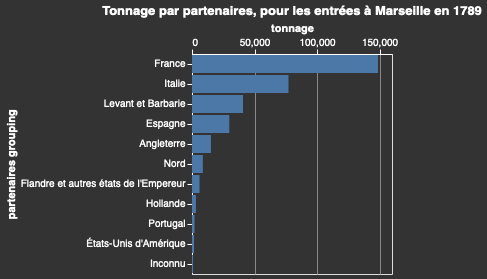

In [152]:

VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Tonnage par partenaires, pour les entrées à Marseille en 1789",
    "mark": {
        "tooltip": {
         "content": "data"
        },
        "type": "bar" #type de visualisation (ici rectangle)
    },
    "data": {
        "values": departures_tonnage_liste #mettre la liste des données
    },
    "encoding": {
        "x": {
            "field": "tonnage",
            "type": "quantitative", #ou nominal 
            "title": "tonnage",
            "axis": {
                "orient": "top"
            }
        },
        "y": {
            "field": "state",
            "type": "nominal",
            "title": "partenaires grouping",
            "sort": {"field" : "tonnage",
                     "order": "descending"}
        },
    }
})

attention : VegaLite ne marche pas sur jupyter notebook -> faire sur VScode ou jupyterlab

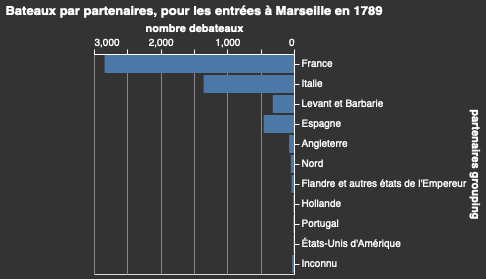

In [153]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Bateaux par partenaires, pour les entrées à Marseille en 1789",
    "mark": {
        "tooltip": {
         "content": "data"
        },
        "type": "bar" #type de visualisation (ici rectangle)
    },
    "data": {
        "values": departures_bateaux_liste #mettre la liste des données
    },
    "encoding": {
        "x": {
            "field": "bateaux",
            "type": "quantitative", #ou nominal 
            "title": "nombre debateaux",
            "axis": {
                "orient": "top"
            },
            "scale": {
                "reverse": True
            }
        },
        "y": {
            "field": "state",
            "type": "nominal",
            "title": "partenaires grouping",
            "axis": {
                "orient": "right",
            },
            "sort": [
                "France",
                "Italie",
                "Levant et Barbarie",
                "Espagne",
                "Angleterre",
                "Nord",
                "Flandre et autres états de l'Empereur",
                "Hollande",
                "Portugal",
                "États-Unis d'Amérique",
                "Inconnu"
                ]
                     }
        },
    })